# plot radex results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy import stats
from scipy.integrate import simpson
%matplotlib inline

In [2]:
# lets look at the ratio in the data

ratio_datafile ='../data/NGC1333_HC3N_ratio_snr5.fits'
ratio_data = fits.getdata(ratio_datafile).flatten()
ratio_data = ratio_data[np.where(~np.isnan(ratio_data))]
data_kde = np.linspace(0, 2, 100)
median = np.percentile(ratio_data, 50)
low = np.percentile(ratio_data, 25)
high= np.percentile(ratio_data, 75)

kernel = stats.gaussian_kde(ratio_data)
dens = kernel(data_kde)
dens /= simpson(dens, data_kde) # normalizing of probability

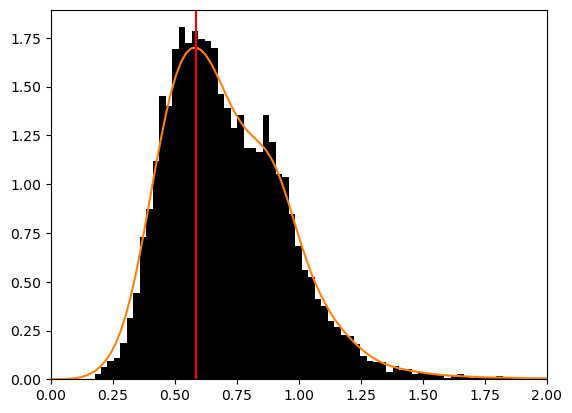

In [3]:
fig =  plt.figure()
ax = fig.add_subplot(111)
ax.hist(ratio_data, fc='k', bins='fd', density=True)
ax.plot(data_kde, dens)
ax.set_xlim([0, 2])
argmaxdens = np.argmax(dens)
moderatio = data_kde[argmaxdens]
ax.axvline(moderatio, color='r')

In [4]:
moderatio

0.5858585858585859

In [5]:
results = pd.read_table('HC3N_10-9_8-7.dat', sep="\s+",header=None)
results_mat = np.transpose(results.values)
temps = np.unique(results_mat[0].astype(int))
dens = np.unique(results_mat[1])
# recast results
mat = np.reshape(results_mat[2], (len(temps),len(dens)))

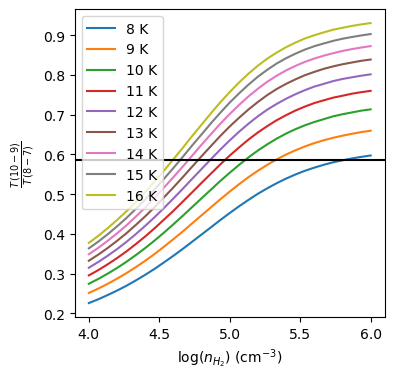

In [6]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

dd, tt = np.meshgrid(dens, temps)

for temp in temps:
    index = np.where(results_mat[0].astype(int)==temp)
    dens = (results_mat[1])[index]
    ratio = (results_mat[2])[index]
    line = ax.plot(dens,ratio,label=str(temp)+' K')[0]
    # label_line(ax,line,str(temp))
ax.legend()
ax.set_xlabel(r'log($n_{H_2}$) (cm$^{-3}$)')
ax.axhline(moderatio, color='k')
ax.set_ylabel(r'$\frac{T\,(10-9)}{T\,(8-7)}$')
fig.savefig('HC3N_ratio_vs_dens.pdf', dpi=300,bbox_inches='tight')

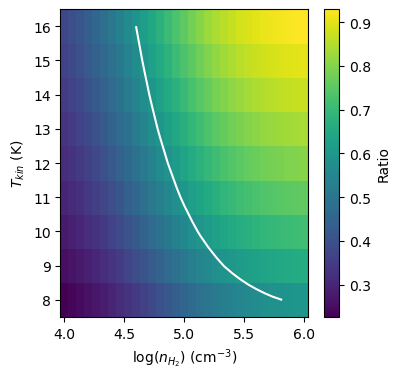

In [15]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
im = ax.pcolor(dens, temps, mat)
fig.colorbar(im, ax = ax, label='Ratio')
ax.set_xlabel(r'log($n_{H_2}$) (cm$^{-3}$)')
ax.set_ylabel(r'$T_{kin}$ (K)')
ax.contour(dens, temps,mat, levels=[moderatio], colors='w')
fig.savefig('HC3N_Tkin_vs_dens.pdf', dpi=300,bbox_inches='tight')

In [8]:
indexT = np.where(results_mat[0].astype(int)==12)
dens = (results_mat[1])[indexT]
ratio = (results_mat[2])[indexT]
print(dens[np.where(np.abs(ratio-moderatio)<0.01)])

[4.867]


Now we estimate the mass

In [9]:
import astropy.units as u
from astropy.constants import m_n, M_sun

In [10]:
nvol = 10 ** 4.87 * (1/u.cm)**3
rhovol = nvol * 2 * m_n
r = 0.015 *u.pc
L = 0.24* u.pc

In [11]:
(np.pi * r**2 * L * rhovol/M_sun).decompose()

<Quantity 0.62246562>

In [12]:
S = 2 * np.pi * r * L
vinf = 0.05 * u.km/u.s

In [13]:
(S * rhovol * vinf).to(u.Msun/u.yr)

<Quantity 4.24402105e-06 solMass / yr>

In [14]:
S

<Quantity 0.02261947 pc2>